# Assignment 1
### This notebook implements testing of the results on the holdout set of data for five
### models with the two datasets.
These two datasets look at Diabetes health predictors and Airline Passenger Satisfaction.
The files that we used are prepared by the Assignment1-DataAnalysis.ipynb notebook. 

Here we take the trained models from the Assignment1-Training.ipynb notebook and 

### Airline Passenger 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from sklearn.exceptions import ConvergenceWarning
import warnings
import pickle
import graphviz
from sklearn import tree

In [2]:
# @ignore_warnings(category=ConvergenceWarning)
# def my_function():
#     # Code that triggers the warning
# "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/download?datasetVersionNumber=1"

In [3]:
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

In [4]:
## Sample size for the data
data_size_sample = 50000
n_iter=20

In [5]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

In [6]:
airline_data = pd.read_csv('./airline_data_test.csv',index_col=0)
airline_data = pd.read_csv('./airline_data_test_business.csv',index_col=0)

In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17980 entries, 0 to 25974
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             17980 non-null  float64
 1   Customer Type                      17980 non-null  float64
 2   Age                                17980 non-null  float64
 3   Type of Travel                     17980 non-null  float64
 4   Class                              17980 non-null  float64
 5   Flight Distance                    17980 non-null  float64
 6   Inflight wifi service              17980 non-null  float64
 7   Departure/Arrival time convenient  17980 non-null  float64
 8   Ease of Online booking             17980 non-null  float64
 9   Gate location                      17980 non-null  float64
 10  Food and drink                     17980 non-null  float64
 11  Online boarding                    17980 non-null  flo

In [8]:
airline_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,0.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.00,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,1.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,1.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.25,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,0.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0


In [9]:
X = airline_data
y = X['satisfaction']
X = X[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]


In [10]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,...,0.50,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462
1,0.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.00,...,1.00,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000
2,1.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,...,0.25,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000
3,1.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.25,...,0.75,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381
4,0.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,...,0.25,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1.0,1.0,0.576923,1.0,1.0,0.050283,0.6,0.6,0.6,0.50,...,0.75,0.8,0.8,0.8,0.75,0.50,0.8,0.6,0.000000,0.000000
25970,0.0,0.0,0.371795,1.0,0.0,0.080977,0.2,1.0,0.2,0.50,...,0.75,0.8,1.0,0.4,1.00,0.25,0.6,0.8,0.000000,0.000000
25971,1.0,0.0,0.346154,1.0,1.0,0.099960,0.6,0.6,0.6,0.00,...,0.75,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000
25972,1.0,1.0,0.205128,1.0,1.0,0.124192,0.8,0.8,0.8,0.75,...,0.75,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000


In [11]:
y

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
25969    1.0
25970    0.0
25971    0.0
25972    1.0
25974    1.0
Name: satisfaction, Length: 17980, dtype: float64

# Read all models and run tests to score

In [12]:
# Airline models

In [13]:
with open('best_search_decision_airline.pkl', 'rb') as f:
    best_search_decision_airline = pickle.load(f)
with open('best_search_boosted_airline.pkl', 'rb') as f:
    best_search_boosted_airline = pickle.load(f)
with open('best_search_knn_airline.pkl', 'rb') as f:
    best_search_knn_airline = pickle.load(f)
with open('best_search_svm_airline.pkl', 'rb') as f:
    best_search_svm_airline = pickle.load(f)
with open('best_search_nn_airline.pkl', 'rb') as f:
    best_search_nn_airline = pickle.load(f)

In [ ]:
classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

In [14]:
# Diabetes models
with open('best_search_decision_diabetes.pkl', 'rb') as f:
    best_search_decision_diabetes = pickle.load(f)
with open('best_search_boosted_diabetes.pkl', 'rb') as f:
    best_search_boosted_diabetes = pickle.load(f)
with open('best_search_knn_diabetes.pkl', 'rb') as f:
    best_search_knn_diabetes = pickle.load(f)
with open('best_search_svm_diabetes.pkl', 'rb') as f:
    best_search_svm_diabetes = pickle.load(f)
with open('best_search_nn_diabetes.pkl', 'rb') as f:
    best_search_nn_diabetes = pickle.load(f)

In [ ]:
## Output confusion Matrix and 

CPU times: user 7.24 s, sys: 0 ns, total: 7.24 s
Wall time: 7.24 s


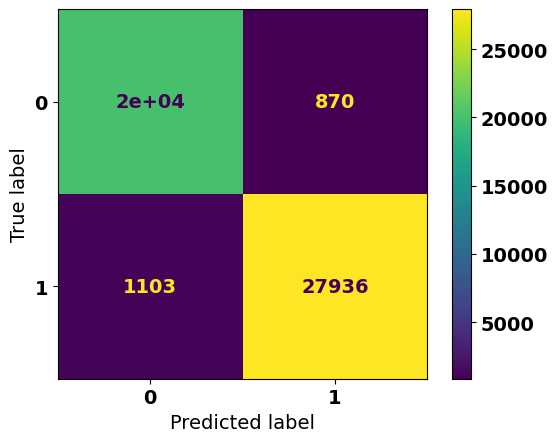

In [69]:
%%time
y_pred = model_search_cv.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

### Neural Network Model


In [70]:
# hidden_layer_sizesarray-like of shape(n_layers - 2,), default=(100,)
# The ith element represents the number of neurons in the ith hidden layer.

# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

# alphafloat, default=0.0001
# batch_sizeint, default=’auto’
# learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’ Only used when solver='sgd'.
# learning_rate_initfloat, default=0.001
# The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
# power_tfloat, default=0.5
# The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. Only used when solver=’sgd’.

# max_iterint, default=200
# Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
# shufflebool, default=True
# Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.

# tolfloat, default=1e-4
# Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

# momentumfloat, default=0.9
# Momentum for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.

# validation_fractionfloat, default=0.1
# The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

# beta_1float, default=0.9
# Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver=’adam’.

# beta_2float, default=0.999
# Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver=’adam’.

# epsilonfloat, default=1e-8
# Value for numerical stability in adam. Only used when solver=’adam’.

# n_iter_no_changeint, default=10
# Maximum number of epochs to not meet tol improvement. Only effective when solver=’sgd’ or ‘adam’.

# max_funint, default=15000
# Only used when solver=’lbfgs’. Maximum number of loss function calls. 
                                                                                    

## Used randomizedsearccv to narrow down hyper parameters

In [71]:
%%time
#neural network performance models - perceptron
nn_model_airline = MLPClassifier(solver='adam', #alpha=1e-5,
                         hidden_layer_sizes=(100, 2), max_iter=2000, random_state=42)
params = {'hidden_layer_sizes':[(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'],\
          'alpha': [1e-4,1e-3], 'learning_rate': ['adaptive','constant', 'invscaling'], 'learning_rate_init': [1e-3,1e-2,1e-1],
          'max_iter': [5000,7500,10000]}#, 'tol': [1e-5,1e-4], 'momentum': [0.7,0.8,0.90,0.95], 'beta_1':[0.9], 'beta_2': [0.999],
          #'epsilon': [1e-9,1e-8,1e-7], 'n_iter_no_change': [10]}
#model_search_cv = GridSearchCV(nn_model, params, verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42)
model_search_cv = RandomizedSearchCV(nn_model_airline,  param_distributions = params, verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42,n_iter=n_iter)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_search_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

CPU times: user 20min 55s, sys: 1h 11min 59s, total: 1h 32min 54s
Wall time: 3min 3s


In [72]:
label_encoder = LabelEncoder()
label_fit = label_encoder.fit(['identity', 'logistic', 'tanh', 'relu'])
label_encoder = LabelEncoder()
label_fit_2 = label_encoder.fit(['adam','lbfgs','sgd'])
label_encoder = LabelEncoder()
label_fit_3 = label_encoder.fit(['adaptive','constant', 'invscaling'])


In [73]:
cv_results = pd.DataFrame(model_search_cv.cv_results_)

### Use plotly to generate a parallel coordinates plot to see where hyperparameter values may be more impactful to produce a higher score

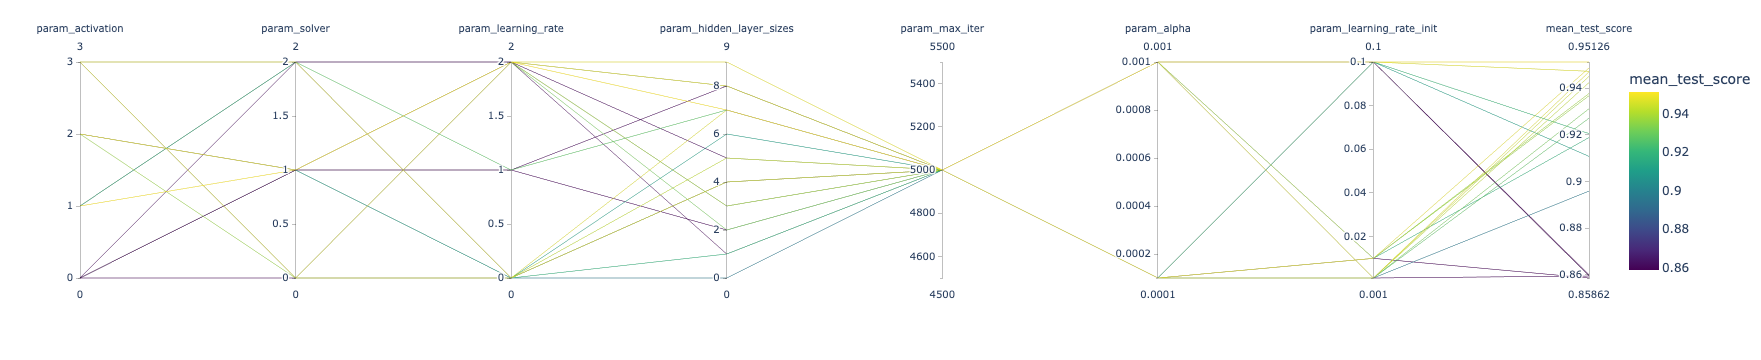

CPU times: user 655 ms, sys: 2.52 s, total: 3.17 s
Wall time: 49.7 ms


In [74]:
%%time
fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            'param_activation': lambda x: label_fit.transform([x])[0],
            'param_solver': lambda x: label_fit_2.transform([x])[0],
            'param_learning_rate': lambda x: label_fit_3.transform([x])[0],
            'param_hidden_layer_sizes': lambda x: [(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,)].index(x),
            'param_max_iter': lambda x: x,
            'param_alpha': lambda x: x,
            'param_learning_rate_init': lambda x: x, 
#            'param_epsilon': lambda x: x, 
#            'param_n_iter_no_change': lambda x: x, 
            'mean_test_score': lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show() 

In [75]:
#pd.DataFrame({'feature': model_search_cv.best_estimator_.feature_names_in_, 'importance':model_search_cv.best_estimator_.feature_importances_})

In [76]:
## Generate the confusion matrix

CPU times: user 816 ms, sys: 2.7 s, total: 3.52 s
Wall time: 57.9 ms


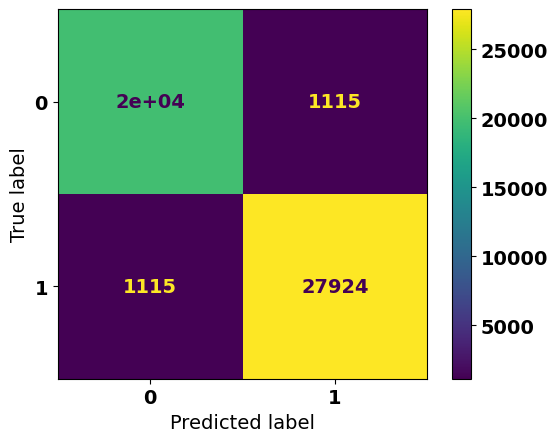

In [77]:
%%time
y_pred = model_search_cv.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [78]:
model_search_cv.best_estimator_.feature_names_in_

array(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], dtype=object)

In [79]:
model_search_cv.best_params_

{'solver': 'lbfgs',
 'max_iter': 5000,
 'learning_rate_init': 0.1,
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (11,),
 'alpha': 0.001,
 'activation': 'logistic'}

In [80]:
best_gridsearch_nn_airline = model_search_cv.best_estimator_

In [81]:
# Generate the new learning curve

/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

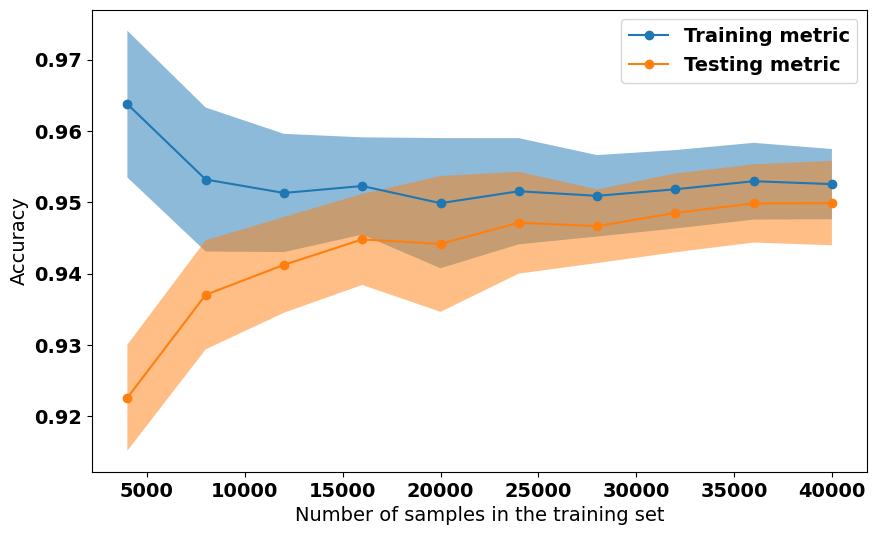

CPU times: user 2.77 s, sys: 637 ms, total: 3.41 s
Wall time: 10min 4s


In [82]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fit_score_times = 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit_score_times = LearningCurveDisplay.from_estimator(model_search_cv.best_estimator_, **common_params, ax=ax,return_times=True)
    plt.show()
print(fit_score_times)

## Look at ROC curves for each of the classifiers

In [83]:
# # decision tree models
# decision_tree_model_diabetes = DecisionTreeClassifier(random_state=42)

# #boosted decision tree
# boosted_decision_tree_model_diabetes = GradientBoostingClassifier(random_state=42)

# # k nearest neighbors
# knn_model_diabetes = KNeighborsClassifier()

# #suppot vector machine
# svm_model_diabetes = SVC(random_state=42)

# #neural network performance models - perceptron
# nn_model_diabetes = MLPClassifier(max_iter=2000, random_state=42)
# for name, clf in [decision_tree_model_diabetes,boosted_decision_tree_model_diabetes,knn_model_diabetes,svm_model_diabetes,nn_model_diabetes]:
#     clf.fit(X,  y)

#     RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
#     DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

# ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
# ax_det.set_title("Detection Error Tradeoff (DET) curves")

# ax_roc.grid(linestyle="--")
# ax_det.grid(linestyle="--")

# plt.legend()
# plt.show()

In [84]:
##svg output of decision tree

/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/anaconda3/envs/ray/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scik

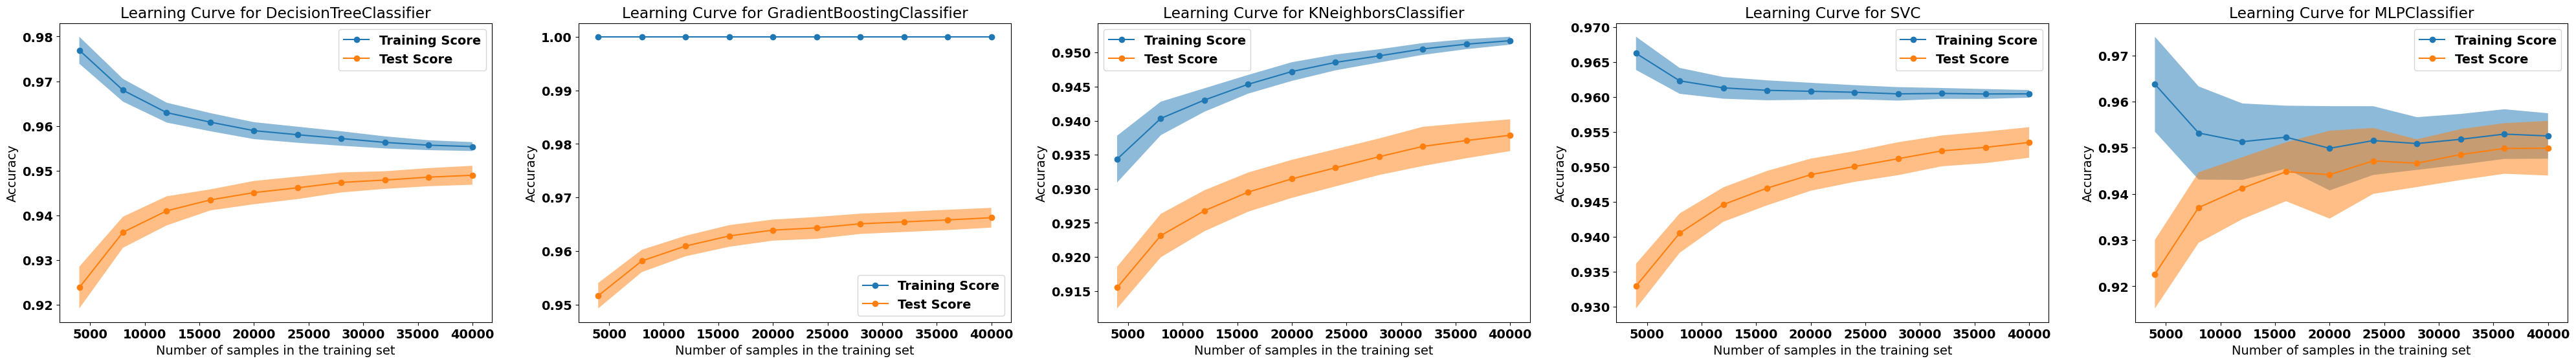

CPU times: user 9.09 s, sys: 6.53 s, total: 15.6 s
Wall time: 38min 53s


In [85]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(50, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fit_score_times = []
for ax_idx, estimator in enumerate([best_gridsearch_decision_airline, best_gridsearch_boosted_airline, best_gridsearch_knn_airline,best_gridsearch_svm_airline,best_gridsearch_nn_airline]):
    tm = LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx],return_times=True)
    fit_score_times.append(tm)
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
plt.show()
print(fit_score_times)

In [86]:
# Save all models to disk
for filename,model in [('best_gridsearch_decision_airline.pkl',best_gridsearch_decision_airline), ('best_gridsearch_boosted_airline.pkl',best_gridsearch_boosted_airline), 
                       ('best_gridsearch_knn_airline.pkl',best_gridsearch_knn_airline),('best_gridsearch_svm_airline.pkl',best_gridsearch_svm_airline),
                       ('best_gridsearch_nn_airline.pkl',best_gridsearch_nn_airline)]:
    pickle.dump(model, open(filename, 'wb'))

## Now Diabetes Dataset

In [87]:

diabetes_data =  pd.read_csv('./diabetes_train_data.csv',index_col=0)



In [88]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56478 entries, 0 to 56477
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                56478 non-null  float64
 1   HighChol              56478 non-null  float64
 2   CholCheck             56478 non-null  float64
 3   BMI                   56478 non-null  float64
 4   Smoker                56478 non-null  float64
 5   Stroke                56478 non-null  float64
 6   HeartDiseaseorAttack  56478 non-null  float64
 7   PhysActivity          56478 non-null  float64
 8   Fruits                56478 non-null  float64
 9   Veggies               56478 non-null  float64
 10  HvyAlcoholConsump     56478 non-null  float64
 11  AnyHealthcare         56478 non-null  float64
 12  NoDocbcCost           56478 non-null  float64
 13  GenHlth               56478 non-null  float64
 14  MentHlth              56478 non-null  float64
 15  PhysHlth           

## Check for imbalanced dataset

In [89]:
## If forecasting diabetes, is the data imbalanced
diabetes_data['Diabetes_binary'].value_counts()

0.0    28239
1.0    28239
Name: Diabetes_binary, dtype: int64

In [90]:
diabetes_data.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [91]:
X = diabetes_data.sample(data_size_sample)
y = X['Diabetes_binary']
X = X[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

In [92]:
y.value_counts()

0.0    25061
1.0    24939
Name: Diabetes_binary, dtype: int64

## Build The models

In [93]:
%%time
# decision tree models
decision_tree_model_diabetes = DecisionTreeClassifier(random_state=42)

#boosted decision tree
boosted_decision_tree_model_diabetes = GradientBoostingClassifier(random_state=42)

# k nearest neighbors
knn_model_diabetes = KNeighborsClassifier()

#suppot vector machine
svm_model_diabetes = SVC(random_state=42)

#neural network performance models - perceptron
nn_model_diabetes = MLPClassifier(max_iter=2000, random_state=42)

CPU times: user 22 µs, sys: 60 µs, total: 82 µs
Wall time: 90.8 µs


## Generate the Learning Curves For Default Models

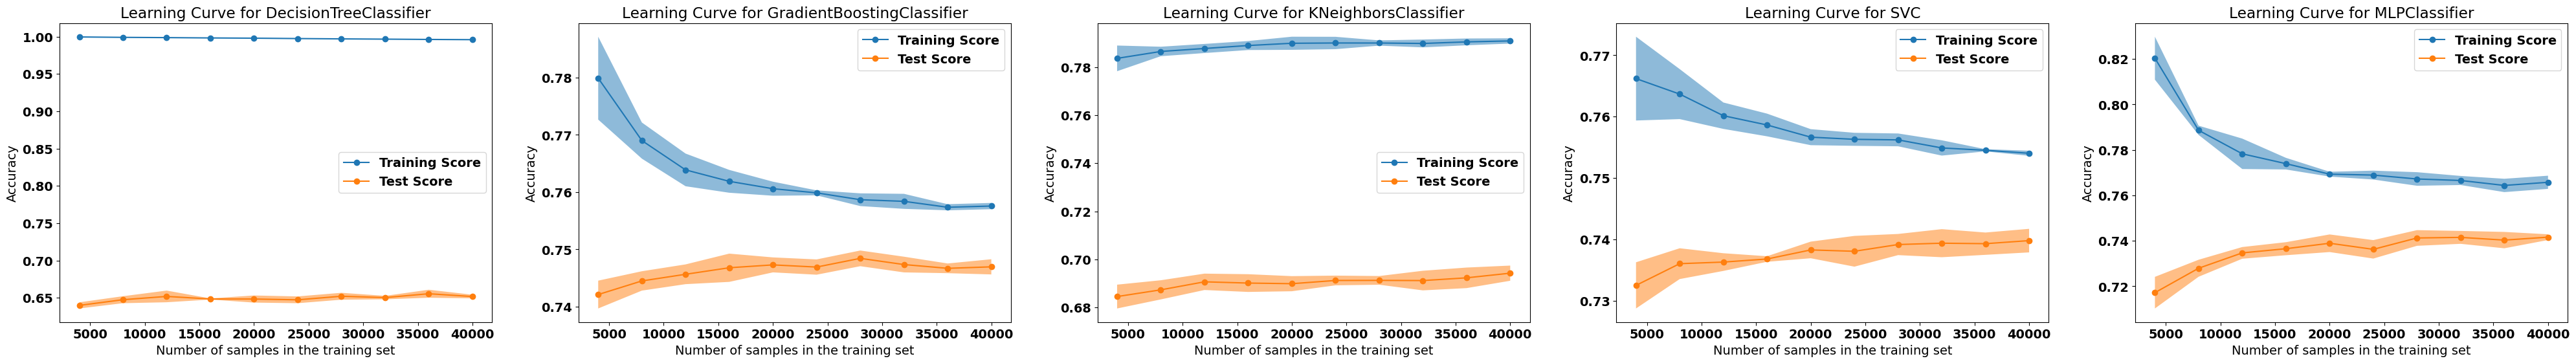

CPU times: user 1.04 s, sys: 368 ms, total: 1.41 s
Wall time: 3min 32s


In [94]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(50, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fit_score_times= []
for ax_idx, estimator in enumerate([decision_tree_model_diabetes, boosted_decision_tree_model_diabetes, knn_model_diabetes,svm_model_diabetes,nn_model_diabetes]):
    tm = LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx],return_times=True)
    fit_score_times.append(tm)
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
plt.show()
pritn(fit_score_times)

In [95]:
# %%time
# decision_tree_model = DecisionTreeClassifier(criterion="entropy",
#                                      random_state=42)
# decision_tree_result = cross_validation(decision_tree_model, X_train, y_train, 5)
# print(decision_tree_result)

In [96]:
# %%time
# train_sizes, train_scores, validation_scores = \
#     learning_curve(estimator = decision_tree_model,
#                    X = X_train,
#                    y = y_train, train_sizes = train_sizes_range, cv = 5,
#                    scoring = 'accuracy') #['accuracy', 'precision', 'recall', 'f1'])

In [97]:
# train_scores_mean = train_scores.mean(axis = 1)
# validation_scores_mean = validation_scores.mean(axis = 1)
# print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
# print('\n', '-' * 20) # separator
# print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

In [98]:
# #plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')
# plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
# plt.ylabel('Accuracy', fontsize = 14)
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves for Decision Tree Diabetes', fontsize = 18, y = 1.03)
# plt.legend()
# plt.ylim(0,1)

In [99]:
# #
# # Calculate training and test mean and std
# #
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(validation_scores, axis=1)
# test_std = np.std(validation_scores, axis=1)
# #
# # Plot the learning curve
# #
# plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
# plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
# plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
# plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
# plt.title('Learning Curve')
# plt.xlabel('Training Data Size')
# plt.ylabel('Model accuracy')
# plt.grid()
# plt.legend(loc='lower right')
# plt.show()

## Now let's use grid search to find close to optimal values for each of the models

### Decision Tree Model

In [100]:
%%time
# decision tree models
decision_tree_model_diabetes = DecisionTreeClassifier(random_state=42)
params = {'criterion': ['entropy', 'gini', 'log_loss'],'max_depth': [2,3,4,5,7,8,9,10,15],#,20,50,70,100,150], 
          'max_leaf_nodes': list(range(10, 100)), 
          'min_samples_split': [2, 3, 4, 5, 6,7,8,9,10,20,50]}
scoring = {"AUC": "roc_auc", "Accuracy": 'accuracy', "F1": 'f1', "Precision": 'precision'}
#model_search_cv = GridSearchCV(decision_tree_model, params, scoring=scoring, refit='AUC',verbose=1,n_jobs=-1, cv=5,return_train_score=True)
model_search_cv = RandomizedSearchCV(decision_tree_model_diabetes,  param_distributions = params, scoring='recall',verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42,n_iter=n_iter)
#model_search_cv.fit(X_resampled, y_resampled)
model_search_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 233 ms, sys: 107 ms, total: 340 ms
Wall time: 622 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 7, 8, 9, 10,
                                                      15],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39, ...],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 20,
                                                              50]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=1)

In [101]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

In [102]:
cv_results = pd.DataFrame(model_search_cv.cv_results_)

In [103]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'param_max_leaf_nodes', 'param_max_depth',
       'param_criterion', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [104]:
label_encoder = LabelEncoder()
label_fit = label_encoder.fit(['entropy','gini', 'log_loss'])

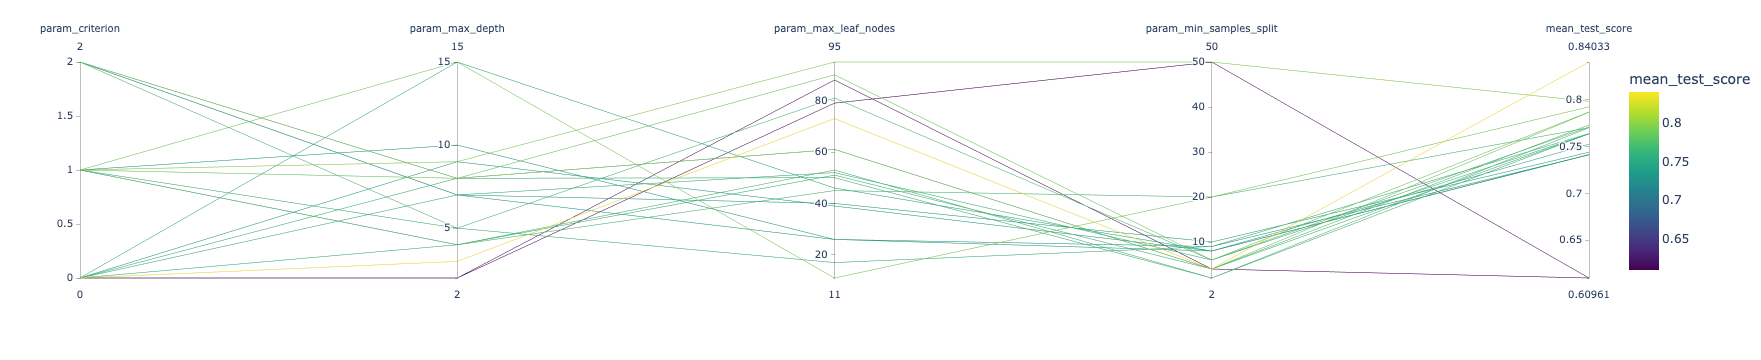

CPU times: user 29.2 ms, sys: 3.24 ms, total: 32.5 ms
Wall time: 28.1 ms


In [105]:
%%time
fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            'param_criterion': lambda x: label_fit.transform([x])[0],
            'param_max_depth': lambda x: x,
            'param_max_leaf_nodes': lambda x: x, #np.log(x),
            'param_min_samples_split': lambda x: x,
            'mean_test_score': lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show() 


In [106]:
model_search_cv.best_estimator_.feature_importances_

array([0.33408821, 0.        , 0.        , 0.06383053, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.53389855, 0.        ,
       0.        , 0.        , 0.        , 0.0681827 , 0.        ,
       0.        ])

In [107]:
model_search_cv.best_estimator_.feature_names_in_

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [108]:
pd.DataFrame({'feature': model_search_cv.best_estimator_.feature_names_in_, 'importance':model_search_cv.best_estimator_.feature_importances_})

,feature,importance
0,HighBP,0.334088
1,HighChol,0.000000
2,CholCheck,0.000000
3,BMI,0.063831
4,Smoker,0.000000
5,Stroke,0.000000
6,HeartDiseaseorAttack,0.000000
7,PhysActivity,0.000000
8,Fruits,0.000000
9,Veggies,0.000000


In [109]:
model_search_cv.best_params_

{'min_samples_split': 4,
 'max_leaf_nodes': 73,
 'max_depth': 3,
 'criterion': 'entropy'}

In [110]:
best_gridsearch_decision_diabetes = model_search_cv.best_estimator_

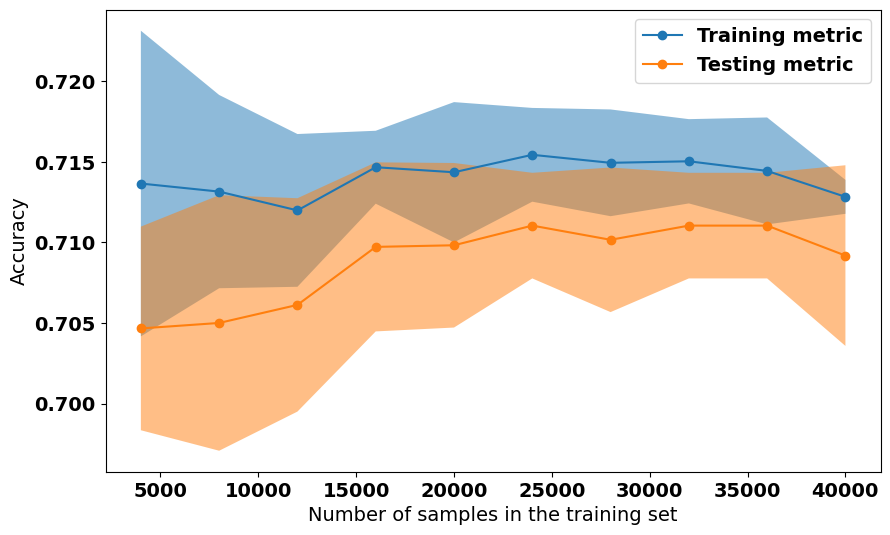

CPU times: user 214 ms, sys: 200 ms, total: 414 ms
Wall time: 420 ms


In [111]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    # "X": X_resampled,
    # "y": y_resampled,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fit_score_times = 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit_score_times = LearningCurveDisplay.from_estimator(model_search_cv.best_estimator_, **common_params, ax=ax,return_times=True)
    plt.show()
print(fit_score_times0)

CPU times: user 50.6 ms, sys: 4.14 ms, total: 54.7 ms
Wall time: 49.1 ms


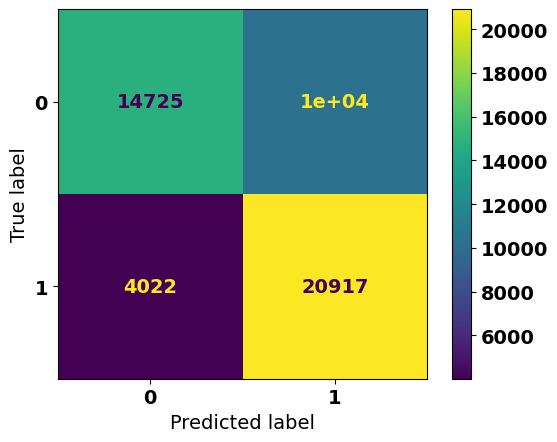

In [112]:
%%time
y_pred = model_search_cv.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

### Boosted Decision Treee

In [113]:
%%time
boosted_decision_tree_model_diabetes = GradientBoostingClassifier(n_estimators=200)
params = {'loss': ['exponential','log_loss'],'learning_rate': [0.001,0.01,0.1], #,0.2,0.5], \
          'n_estimators': [100, 500, 1000, 2000], #, 5000], \ 
          'max_depth': [2,3,4,5,], #,7,8,9,10], \
#          'max_leaf_nodes': list(range(10, 50,10)), 
          'min_samples_split': [2, 3, 4, 5]} #, 6,7,8,9,10]}
scoring = {"AUC": "roc_auc", "Accuracy": 'accuracy', "F1": 'f1'}
#model_search_cv = GridSearchCV(boosted_decision_tree_model, params, verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42)
model_search_cv = RandomizedSearchCV(boosted_decision_tree_model_diabetes, param_distributions = params, scoring='f1',verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42,n_iter=n_iter)
model_search_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1min 24s, sys: 112 ms, total: 1min 24s
Wall time: 3min 45s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=200),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'loss': ['exponential', 'log_loss'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 500, 1000, 2000]},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [114]:
label_encoder = LabelEncoder()
label_fit = label_encoder.fit(['exponential','log_loss'])

In [115]:
cv_results = pd.DataFrame(model_search_cv.cv_results_)

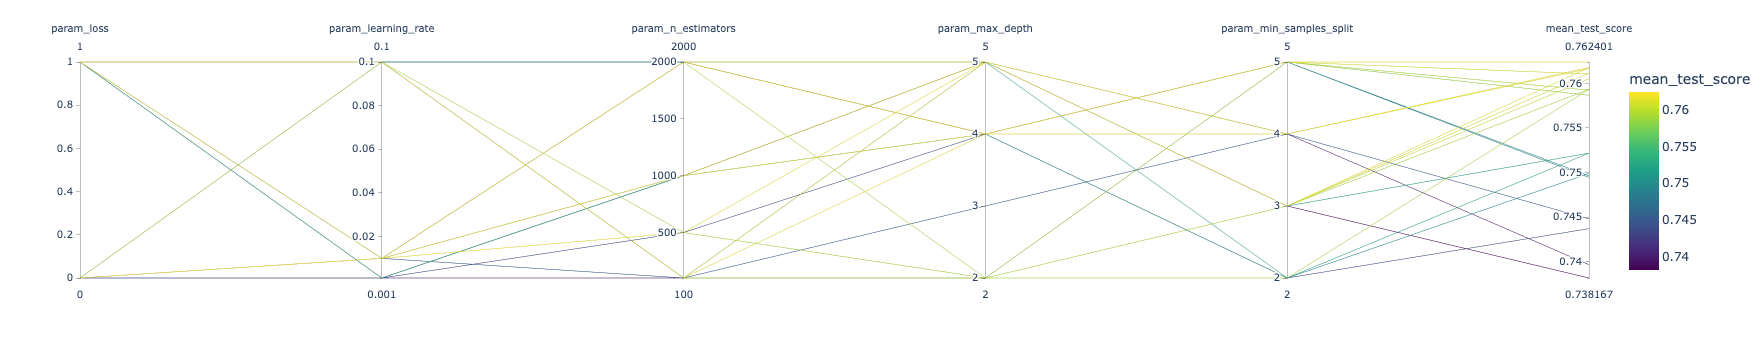

CPU times: user 27.9 ms, sys: 0 ns, total: 27.9 ms
Wall time: 26 ms


In [116]:
%%time
fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            'param_loss': lambda x: label_fit.transform([x])[0],
            'param_learning_rate': lambda x: x,
            'param_n_estimators': lambda x: x,
            'param_max_depth': lambda x: x,
#            'param_max_leaf_nodes': lambda x: x, #np.log(x),
            'param_min_samples_split': lambda x: x,
            'mean_test_score': lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show() 

In [117]:
model_search_cv.best_estimator_.feature_importances_

array([0.21126311, 0.06076417, 0.00963827, 0.12814828, 0.0022288 ,
       0.00233718, 0.01812994, 0.00187939, 0.00196107, 0.00226712,
       0.01057479, 0.00106736, 0.00116638, 0.37704056, 0.00929714,
       0.00825714, 0.0130939 , 0.00980907, 0.10564331, 0.00873046,
       0.01670257])

In [118]:
model_search_cv.best_estimator_.feature_names_in_

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [119]:
model_search_cv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'max_depth': 4,
 'loss': 'exponential',
 'learning_rate': 0.01}

In [120]:
best_gridsearch_boosted_diabetes = model_search_cv.best_estimator_

In [121]:
pd.DataFrame({'feature': model_search_cv.best_estimator_.feature_names_in_, 'importance':model_search_cv.best_estimator_.feature_importances_})

,feature,importance
0,HighBP,0.211263
1,HighChol,0.060764
2,CholCheck,0.009638
3,BMI,0.128148
4,Smoker,0.002229
5,Stroke,0.002337
6,HeartDiseaseorAttack,0.018130
7,PhysActivity,0.001879
8,Fruits,0.001961
9,Veggies,0.002267


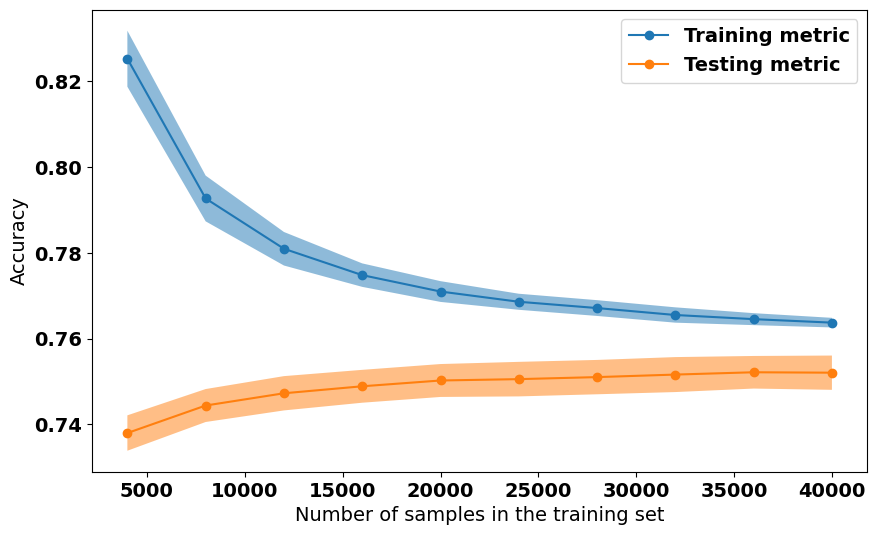

CPU times: user 1.51 s, sys: 450 ms, total: 1.96 s
Wall time: 9min 24s


In [122]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fit_score_times = 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit_score_times = LearningCurveDisplay.from_estimator(model_search_cv.best_estimator_, **common_params, ax=ax,return_times=True)
    plt.show()
print(fit_score_times)

CPU times: user 1.69 s, sys: 5.12 ms, total: 1.69 s
Wall time: 1.68 s


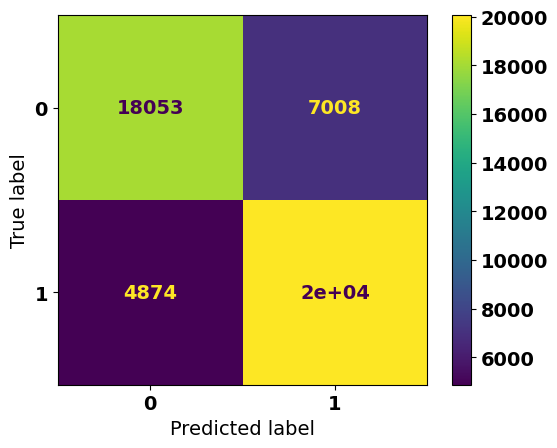

In [123]:
%%time
y_pred = model_search_cv.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [124]:
### KNN Model

In [125]:
%%time
knn_model_diabetes = KNeighborsClassifier(n_neighbors=3,p=2)
from scipy.stats import loguniform
params = {'weights': ['distance','uniform'],'n_neighbors': [3,4,5,6,7,10], \
          'algorithm': ['auto','ball_tree','brute','kd_tree'],'leaf_size': [10,20,30,40,50], \
          'p': [1,2], 'metric': ['minkowski']}
#model_search_cv = GridSearchCV(knn_model, params, verbose=1,n_jobs=-1, cv=5,return_train_score=True,scoring='f1')
model_search_cv = RandomizedSearchCV(knn_model_diabetes, param_distributions = params, scoring='f1',verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42,n_iter=n_iter)
model_search_cv.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 237 ms, sys: 82 ms, total: 319 ms
Wall time: 2min 30s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'brute', 'kd_tree'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [3, 4, 5, 6, 7, 10],
                                        'p': [1, 2],
                                        'weights': ['distance', 'uniform']},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [126]:
best_gridsearch_knn_diabetes = model_search_cv.best_estimator_

In [127]:
label_encoder = LabelEncoder()
label_fit = label_encoder.fit(['distance','uniform'])
label_encoder = LabelEncoder()
label_fit_2 = label_encoder.fit(['auto','ball_tree','brute','kd_tree'])

In [128]:
cv_results = pd.DataFrame(model_search_cv.cv_results_)

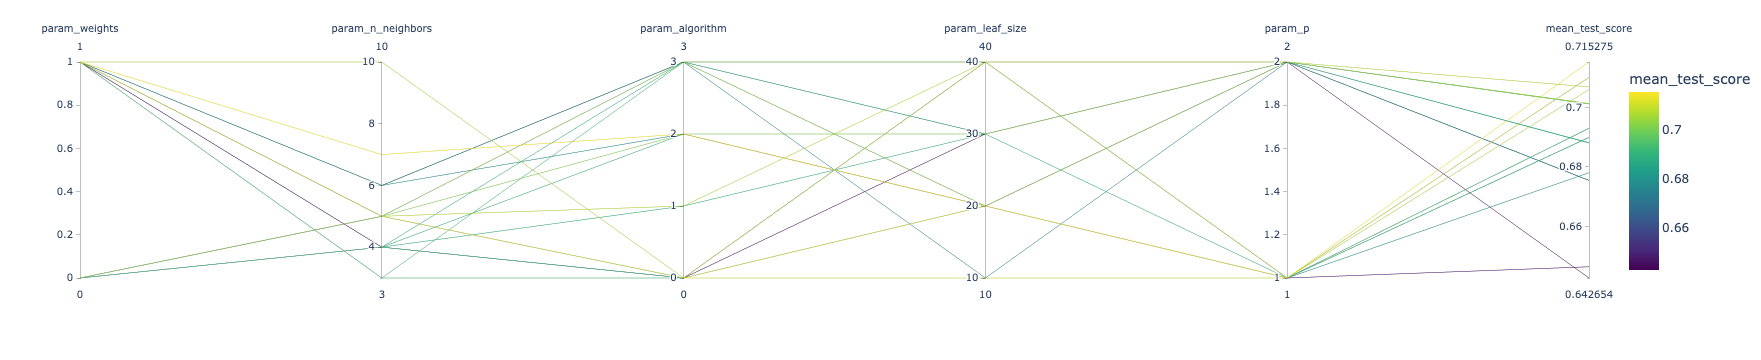

CPU times: user 36.4 ms, sys: 1.03 ms, total: 37.4 ms
Wall time: 30.7 ms


In [129]:
%%time
fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            'param_weights': lambda x: label_fit.transform([x])[0],
            'param_n_neighbors': lambda x: x,
            'param_algorithm': lambda x: label_fit_2.transform([x])[0],
            'param_leaf_size': lambda x: x, #np.log(x),
            'param_p': lambda x: x,
            'mean_test_score': lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show() 

In [130]:
model_search_cv.best_estimator_.feature_names_in_

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [131]:
model_search_cv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 7,
 'metric': 'minkowski',
 'leaf_size': 20,
 'algorithm': 'brute'}

In [132]:
best_gridsearch_knn_diabetes = model_search_cv.best_estimator_

In [133]:
# from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# n_neighbors = model_search_cv.best_params_.n_neighbors
# Z = best_gridsearch_knn_diabetes.predict(np.c_[xx.ravel(), yy.ravel()])

# Z = Z.reshape(xx.shape)
# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("3-Class classification (k = %i)" % (n_neighbors))
# plt.show()

In [134]:
#pd.DataFrame({'feature': model_search_cv.best_estimator_.feature_names_in_, 'importance':model_search_cv.best_estimator_.feature_importances_})

In [135]:
model_search_cv.best_estimator_.feature_names_in_

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

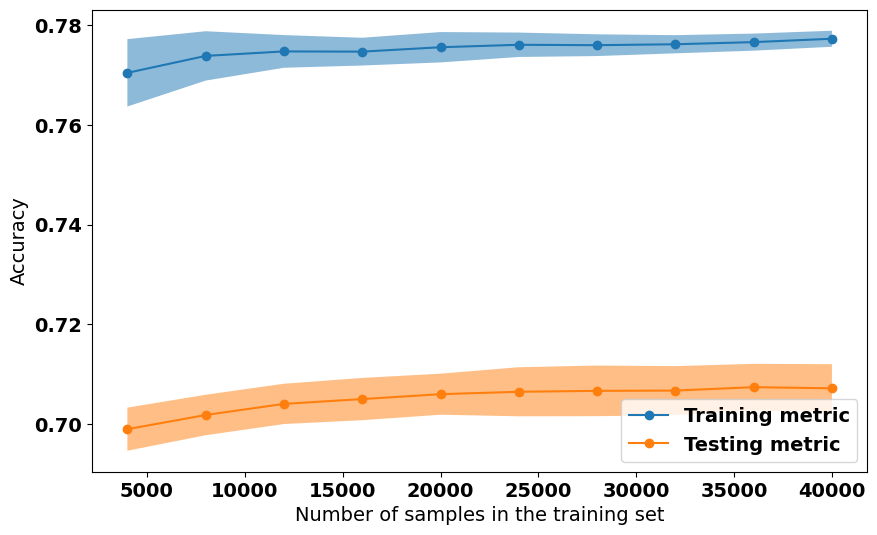

CPU times: user 1.14 s, sys: 346 ms, total: 1.48 s
Wall time: 3min 47s


In [136]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fit_score_times = 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit_score_times = LearningCurveDisplay.from_estimator(model_search_cv.best_estimator_, **common_params, ax=ax,return_times=True)
    plt.show()
print(fit_score_times)

CPU times: user 1min 37s, sys: 0 ns, total: 1min 37s
Wall time: 2.2 s


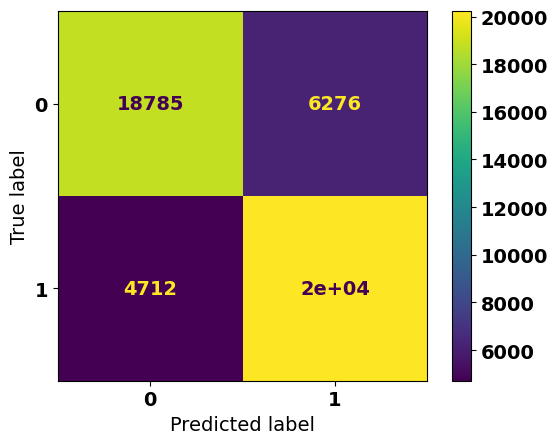

In [137]:
%%time
y_pred = best_gridsearch_knn_diabetes.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [138]:
# n_neighborsint, default=5
# weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# leaf_sizeint, default=30
# pint, default=2 1/2
# metricstr or callable, default=’minkowski’
# metric_paramsdict, default=None

In [139]:
# Cfloat, default=1.0
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# degreeint, default=3
# gamma{‘scale’, ‘auto’} or float, default=’scale’
# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if ‘auto’, uses 1 / n_features
# if float, must be non-negative.
# coef0float, default=0.0
# Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
# tolfloat, default=1e-3
# Tolerance for stopping criterion.
# class_weightdict or ‘balanced’, default=None
# Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight on
# decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
# Whether to return a one-vs-rest (‘ovr’) decision function of s


In [140]:
### SVM Model

In [141]:
%%time
svm_model_diabetes = SVC(random_state=42)
params = {'C': [0.1,0.3,0.5,1.0,5,10], 'kernel': ['linear','poly','rbf','sigmoid'],'degree': [3,4,5,10], \
          'gamma': [0.1,0.3,0.5], 'tol': [1e-3,5e-3,1e-2,5e-2]} # 'gamma': ['auto','scale'],
#model_search_cv = GridSearchCV(svm_model, params, scoring='f1', verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42)
model_search_cv = RandomizedSearchCV(svm_model_diabetes, param_distributions = params,scoring='f1', verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42,n_iter=n_iter)
model_search_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1min 20s, sys: 88.8 ms, total: 1min 20s
Wall time: 11min 47s


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1.0], 'degree': [3, 4, 5, 10],
                                        'gamma': [0.1, 0.3, 0.5],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'tol': [0.001, 0.005, 0.01, 0.05]},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [142]:
label_encoder = LabelEncoder()
label_fit = label_encoder.fit(['linear','poly','rbf','sigmoid'])
label_encoder = LabelEncoder()
label_fit_2 = label_encoder.fit(['auto','scale'])

In [143]:
cv_results = pd.DataFrame(model_search_cv.cv_results_)

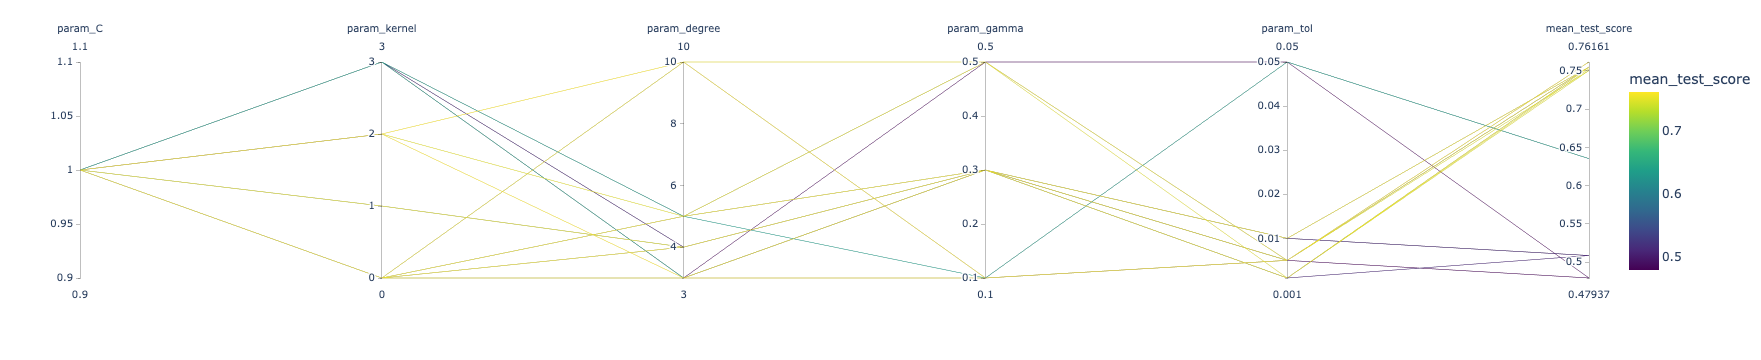

CPU times: user 28.1 ms, sys: 189 µs, total: 28.3 ms
Wall time: 27 ms


In [144]:
%%time
fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            'param_C': lambda x: x,
            'param_kernel': lambda x: label_fit.transform([x])[0],
            'param_degree': lambda x: x,
            'param_gamma': lambda x: x,
            'param_tol': lambda x: x, #np.log(x),
            'mean_test_score': lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show() 

In [145]:
model_search_cv.best_estimator_.feature_names_in_

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [146]:
model_search_cv.best_params_

{'tol': 0.005, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 1.0}

In [147]:
best_gridsearch_svm_diabetes = model_search_cv.best_estimator_

In [148]:
# pd.DataFrame({'feature': model_search_cv.best_estimator_.feature_names_in_, 'importance':model_search_cv.best_estimator_.feature_importances_})

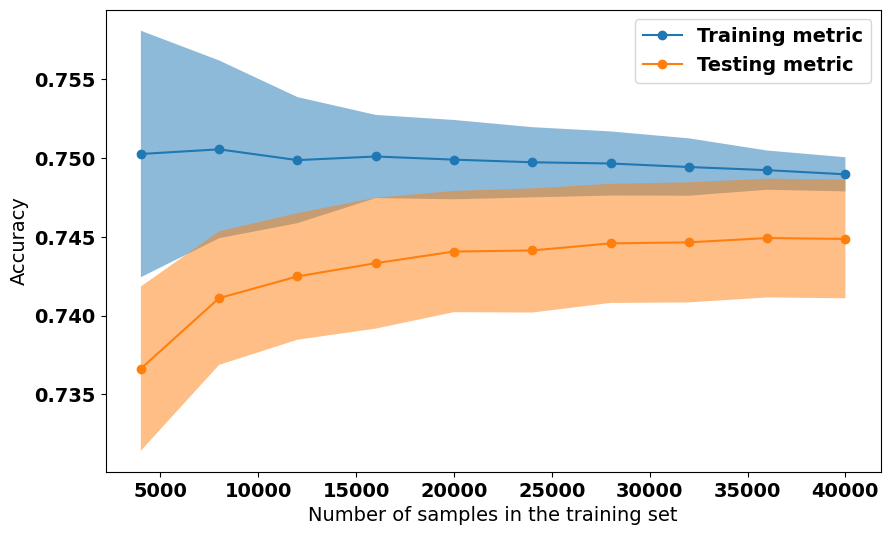

CPU times: user 3.01 s, sys: 5.24 s, total: 8.25 s
Wall time: 16min 58s


In [149]:
%%time

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fit_score_times = 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit_score_times = LearningCurveDisplay.from_estimator(model_search_cv.best_estimator_, **common_params, ax=ax,return_times=True)
    plt.show()
print(fit_score_times)

CPU times: user 1min 21s, sys: 487 µs, total: 1min 21s
Wall time: 1min 21s


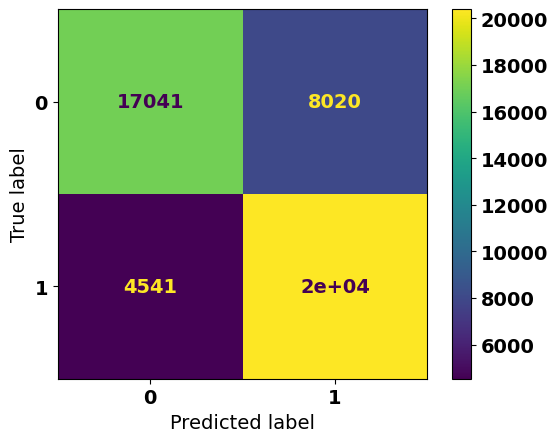

In [150]:
%%time
y_pred = model_search_cv.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [151]:
### Neural Network Model
#nn_model 

In [152]:
# hidden_layer_sizesarray-like of shape(n_layers - 2,), default=(100,)
# The ith element represents the number of neurons in the ith hidden layer.

# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

# alphafloat, default=0.0001
# batch_sizeint, default=’auto’
# learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’ Only used when solver='sgd'.
# learning_rate_initfloat, default=0.001
# The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
# power_tfloat, default=0.5
# The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. Only used when solver=’sgd’.

# max_iterint, default=200
# Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
# shufflebool, default=True
# Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.

# tolfloat, default=1e-4
# Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

# momentumfloat, default=0.9
# Momentum for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.

# validation_fractionfloat, default=0.1
# The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

# beta_1float, default=0.9
# Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver=’adam’.

# beta_2float, default=0.999
# Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver=’adam’.

# epsilonfloat, default=1e-8
# Value for numerical stability in adam. Only used when solver=’adam’.

# n_iter_no_changeint, default=10
# Maximum number of epochs to not meet tol improvement. Only effective when solver=’sgd’ or ‘adam’.

# max_funint, default=15000
# Only used when solver=’lbfgs’. Maximum number of loss function calls. 
                                                                                    

In [153]:
%%time
#neural network performance models - perceptron
nn_model_diabetes = MLPClassifier(solver='adam', random_state=42)
params = {'hidden_layer_sizes':[(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'],\
          'alpha': [1e-4,1e-3], 'learning_rate': ['adaptive','constant', 'invscaling'], 'learning_rate_init': [1e-3,1e-2,1e-1],
          'max_iter': [5000,5000]}#, 'tol': [1e-5,1e-4], 'momentum': [0.7,0.8,0.90,0.95], 'beta_1':[0.9], 'beta_2': [0.999],
          #'epsilon': [1e-9,1e-8,1e-7], 'n_iter_no_change': [10]}
#model_search_cv = GridSearchCV(nn_model, params, scoring='f1', verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42)
model_search_cv = RandomizedSearchCV(nn_model_diabetes,param_distributions = params, scoring='f1',verbose=1,n_jobs=-1, cv=5,return_train_score=True,random_state=42,n_iter=n_iter)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_search_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 8.15 s, sys: 94.4 ms, total: 8.24 s
Wall time: 30.3 s


In [154]:
label_encoder = LabelEncoder()
label_fit = label_encoder.fit(['identity', 'logistic', 'tanh', 'relu'])
label_encoder = LabelEncoder()
label_fit_2 = label_encoder.fit(['adam','lbfgs','sgd'])
label_encoder = LabelEncoder()
label_fit_3 = label_encoder.fit(['adaptive','constant', 'invscaling'])


In [155]:
cv_results = pd.DataFrame(model_search_cv.cv_results_)

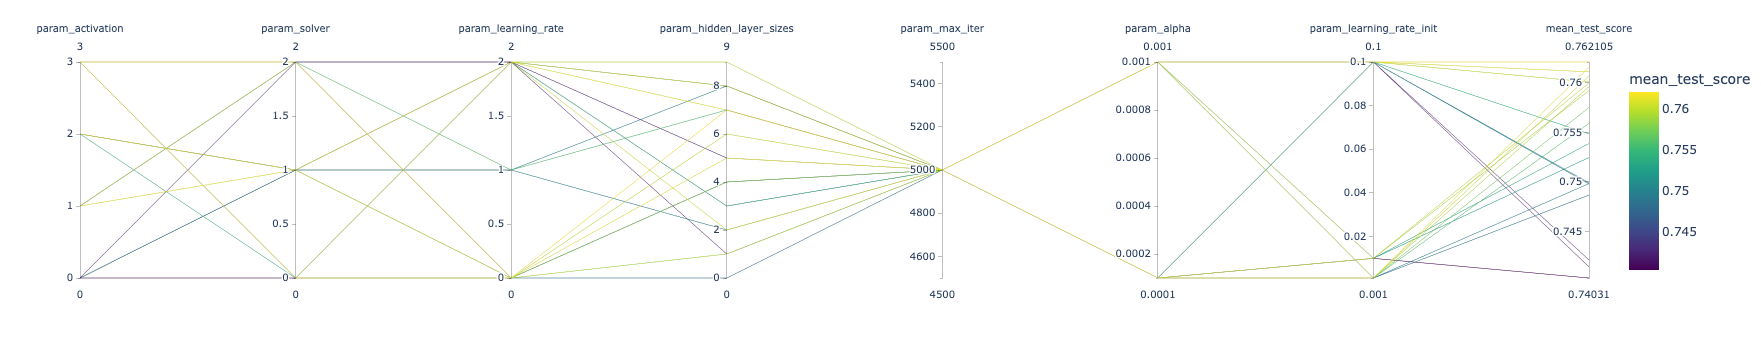

CPU times: user 36.7 ms, sys: 1.42 ms, total: 38.1 ms
Wall time: 33.6 ms


In [156]:
%%time
fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            'param_activation': lambda x: label_fit.transform([x])[0],
            'param_solver': lambda x: label_fit_2.transform([x])[0],
            'param_learning_rate': lambda x: label_fit_3.transform([x])[0],
            'param_hidden_layer_sizes': lambda x: [(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,)].index(x),
            'param_max_iter': lambda x: x,
            'param_alpha': lambda x: x,
            'param_learning_rate_init': lambda x: x, 
#            'param_epsilon': lambda x: x, 
#            'param_n_iter_no_change': lambda x: x, 
            'mean_test_score': lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show() 

In [157]:
model_search_cv.best_estimator_.feature_names_in_

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [158]:
model_search_cv.best_params_

{'solver': 'sgd',
 'max_iter': 5000,
 'learning_rate_init': 0.1,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (11,),
 'alpha': 0.001,
 'activation': 'tanh'}

In [159]:
best_gridsearch_nn_diabetes = model_search_cv.best_estimator_

In [160]:
#best_gridsearch_nn_diabetes.best_params_

In [161]:
#pd.DataFrame({'feature': model_search_cv.best_estimator_.feature_names_in_, 'importance':model_search_cv.best_estimator_.feature_importances_})

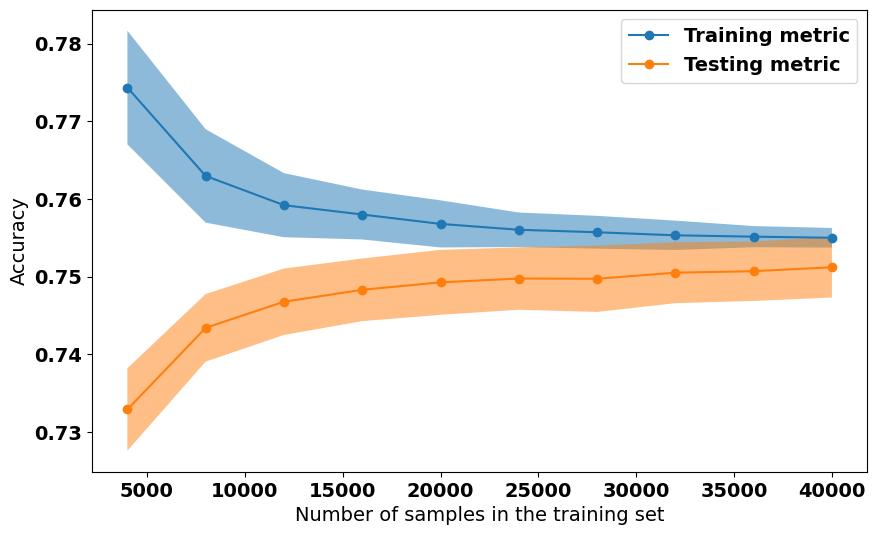

CPU times: user 1.49 s, sys: 368 ms, total: 1.85 s
Wall time: 1min 9s


In [162]:
%%time

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fit_score_times = 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit_score_times = LearningCurveDisplay.from_estimator(model_search_cv.best_estimator_, **common_params, ax=ax,return_times=True)
    plt.show()
print(fit_score_times)

CPU times: user 1.24 s, sys: 4.8 s, total: 6.04 s
Wall time: 107 ms


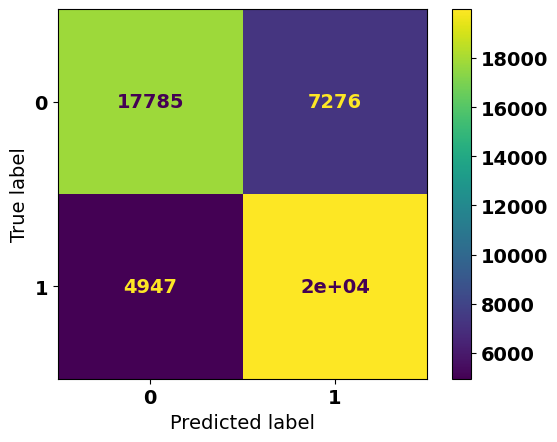

In [163]:
%%time
y_pred = model_search_cv.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(50, 6), sharey=False)
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42), #50
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fit_score_times = []
for ax_idx, estimator in enumerate([best_gridsearch_decision_diabetes, best_gridsearch_boosted_diabetes, best_gridsearch_knn_diabetes,best_gridsearch_svm_diabetes,best_gridsearch_nn_diabetes]):
    tm = LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx],return_times=True)
    fit_score_times.append(tm)
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
plt.show()
print(fit_score_times)

In [ ]:
%%time
# Save all models to disk
for filename,model in [('best_gridsearch_decision_diabetes.pkl',best_gridsearch_decision_diabetes), ('best_gridsearch_boosted_diabetes.pkl',best_gridsearch_boosted_diabetes), 
                       ('best_gridsearch_knn_diabetes.pkl',best_gridsearch_knn_diabetes),('best_gridsearch_svm_diabetes.pkl',best_gridsearch_svm_diabetes),
                       ('best_gridsearch_nn_diabetes.pkl',best_gridsearch_nn_diabetes)]:
    pickle.dump(model, open(filename, 'wb'))